In [75]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV

In [2]:
data=pd.read_csv('C:/Users/etokarev/OneDrive - Philip Morris International/Desktop/private/Netology/machine learning/08_Выбросы и генерация новых значений/house-prices-advanced-regression-techniques/train.csv')
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
categorials = list(data.dtypes[data.dtypes == object].index)

data[categorials].fillna('nan')
#data[categorials].nunique().sum()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,nan,nan,nan,WD,Normal
1,RL,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,nan,nan,nan,WD,Normal
2,RL,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,nan,nan,nan,WD,Normal
3,RL,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,nan,nan,nan,WD,Abnorml
4,RL,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,nan,nan,nan,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,nan,nan,nan,WD,Normal
1456,RL,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,nan,MnPrv,nan,WD,Normal
1457,RL,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,nan,GdPrv,Shed,WD,Normal
1458,RL,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,nan,nan,nan,WD,Normal


In [16]:
def int_cat(categ_cat, all_cat):
    l=[]
    for i in all_cat:
        if i not in categ_cat:
            if i not in ('ID', 'SalePrice'):
                l.append(i)
    return l

integ=int_cat(data[categorials].columns, list(data.columns))
                

In [19]:
data_int=data[integ].fillna(-999999)
data_int

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,240,366,0,112,0,0,0,0,4,2010


In [21]:
data_cat = pd.get_dummies(data[categorials], columns=categorials)
data_cat



,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
#data_.drop(data[categorials].columns, inplace=True)
data_new=pd.concat([data_cat,data_int], axis=1)
data_new

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,0,1,0,0,1,0,0,0,...,548,0,61,0,0,0,0,0,2,2008
1,0,0,0,1,0,0,1,0,0,0,...,460,298,0,0,0,0,0,0,5,2007
2,0,0,0,1,0,0,1,0,0,1,...,608,0,42,0,0,0,0,0,9,2008
3,0,0,0,1,0,0,1,0,0,1,...,642,0,35,272,0,0,0,0,2,2006
4,0,0,0,1,0,0,1,0,0,1,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,0,0,0,1,0,0,1,0,0,0,...,500,349,0,0,0,0,0,0,2,2010
1457,0,0,0,1,0,0,1,0,0,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,0,0,0,1,0,0,1,0,0,0,...,240,366,0,112,0,0,0,0,4,2010


In [27]:
x_train, x_test, y_train, y_test = train_test_split(data_new, data['SalePrice'], test_size=0.30, random_state=42)

In [80]:
clf_rf = RandomForestRegressor()
clf_rf.fit(x_train, y_train)
clf_rf.score(x_train, y_train)

0.9774211454341243

In [81]:
clf_rf.score(x_test, y_test)

0.8951788858329845

Выводим 5 самых важных признаков

In [69]:
imp = pd.Series(clf_rf.feature_importances_)
i=imp.sort_values(ascending=False).head().index

l=[]
for j in i:
    l.append(data_new.columns[j])   

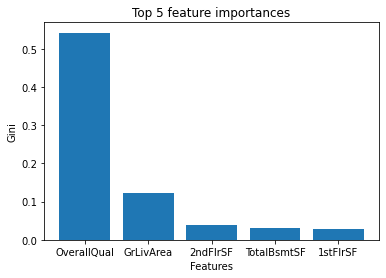

In [70]:
imp = pd.Series(clf_rf.feature_importances_)
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(l, imp.sort_values(ascending=False).head(5))
plt.show()

In [77]:
result=cross_val_score( RandomForestRegressor(), data_new, data['SalePrice'], cv = 10, scoring ='r2') 

In [78]:
result.mean()

0.8645381439352013

Правильно ли я понимаю, что в среднем r2 для модели Random Forest на данном dataset равно 0,86?

Стекинг

In [85]:
Regressor = StackingRegressor(
    [
        ('LinearRegression', LinearRegression()),
        ('KNeighborsRegressor', KNeighborsRegressor()),
        ('DecisionTree', DecisionTreeRegressor())
    ], RidgeCV())

In [97]:
Regressor.fit(x_train, y_train)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('KNeighborsRegressor', KNeighborsRegressor()),
                              ('DecisionTree', DecisionTreeRegressor())],
                  final_estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

In [99]:
print(f'Score on train data {Regressor.score(x_train, y_train)}')
print(f'Score on test data {Regressor.score(x_test, y_test)}')

for i in Regressor.named_estimators:
    print(f'Score on train data with model {i} {Regressor.named_estimators_[i].score(x_train, y_train)}')
    print(f'Score on test data with model {i} {Regressor.named_estimators_[i].score(x_test, y_test)}')

Score on train data 0.9461853936217584
Score on test data 0.7774144232117436
Score on train data with model LinearRegression 0.9407156321865459
Score on test data with model LinearRegression -1.4879005801634992
Score on train data with model KNeighborsRegressor 0.739527232017994
Score on test data with model KNeighborsRegressor 0.6548290035545044
Score on train data with model DecisionTree 1.0
Score on test data with model DecisionTree 0.7097995174356806


Лучше всех из 3 моделей отработало дерево решений (результат на тестовой выборке лучше всего). Далее идет метод ближайшего соседа. Хуже всего линейная регрессия. При этом результат, который показал стекинг на тестовой выборке лусше всего